In [1]:
import qpm
import pandas as pd
import numpy as np
import statsmodels.api as sm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() 

In [3]:
_DATA_DIR = '/Users/yyklgu/Downloads'  

In [4]:
_STRATEGY_NAME = 'Jone'      
_SORT_FREQUENCY = 'June'        # Either "Monthly" or "June"

_REMOVE_MICRO_CAPS = False      # Either "True" or "False"
_SAMPLE_START = '1999-01-01'    # For ESG data: '2014-01-01'
_SAMPLE_END = '2024-01-01'
_NUM_PORT = 5

In [5]:
signal_variables = ['act','che','dlc','lct','txp','dp','lt','at','dltt','seq','ni','oancf','dm','revt','ppegt']

In [6]:
df_full = qpm.load_data(data_dir = _DATA_DIR, file_name = 'MasterData.parquet', variable_list = signal_variables)

> Loading Raw Data...
> Renaming key variables...
> Dropping duplicates...
> Creating Auxiliary Variables...


In [7]:
df_full

,txp,exchcd,ticker,retx,dltt,oancf,rf,ppegt,mktrf,cogs,...,shrout,cma,lt,ldate,profitA,ldate_lag,screen,ldate_lag12,screen12,me_lagged
0,1.841,3,EWST,-0.004348,15.881,6.008,0.0015,56.904,0.0160,111.968,...,2.566,-0.0026,45.648,2001-12-01,0.130132,NaT,NaN,NaT,NaN,NaN
1,1.841,3,EWST,-0.013100,15.881,6.008,0.0014,56.904,-0.0144,111.968,...,2.566,0.0286,45.648,2002-01-01,0.130132,2001-12-01,1.0,NaT,NaN,29.380699
2,1.841,3,EWST,-0.053097,15.881,6.008,0.0013,56.904,-0.0229,111.968,...,2.569,0.0511,45.648,2002-02-01,0.130132,2002-01-01,1.0,NaT,NaN,28.995800
3,1.841,3,EWST,-0.028037,15.881,6.008,0.0013,56.904,0.0424,111.968,...,2.571,0.0059,45.648,2002-03-01,0.130132,2002-02-01,1.0,NaT,NaN,27.488300
4,1.841,3,EWST,-0.043269,15.881,6.008,0.0015,56.904,-0.0520,111.968,...,2.571,0.0537,45.648,2002-04-01,0.130132,2002-03-01,1.0,NaT,NaN,26.738400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134698,1235.000,3,TSLA,-0.028372,3761.000,14724.000,0.0044,48134.000,0.0434,56862.000,...,3189.196,-0.0307,36440.000,2024-05-01,0.298768,2024-04-01,1.0,2023-05-01,1.0,584515.812500
1134699,1204.000,3,TSLA,0.111186,6528.000,13256.000,0.0041,60203.000,0.0277,74446.000,...,3194.640,-0.0178,43009.000,2024-06-01,0.209411,2024-05-01,1.0,2023-06-01,1.0,567932.000000
1134700,1204.000,3,TSLA,0.172781,6528.000,13256.000,0.0045,60203.000,0.0124,74446.000,...,3194.640,0.0043,43009.000,2024-07-01,0.209411,2024-06-01,1.0,2023-07-01,1.0,632155.375000
1134701,1204.000,3,TSLA,-0.077391,6528.000,13256.000,0.0048,60203.000,0.0161,74446.000,...,3194.640,0.0086,43009.000,2024-08-01,0.209411,2024-07-01,1.0,2023-08-01,1.0,741380.125000


In [8]:
df_full['NFO'] = df_full['dlc'] + df_full['dltt'] 
df_full['B'] = df_full['seq'] 
df_full['NOA'] = df_full['NFO'] + df_full['B'] 
df_full['TA'] = df_full['NOA'].diff(12)
    
df_full['delta_REV'] = df_full['revt'].diff(12)
df_full['total_assets_lagged'] =  df_full['at'].shift(12)
df_full['TA_scaled'] = df_full['TA'] / df_full['total_assets_lagged']
df_full['delta_REV_scaled'] = df_full['delta_REV'] / df_full['total_assets_lagged']
df_full['PPE_scaled'] = df_full['ppegt'] / df_full['total_assets_lagged']
    
df_full.replace([np.inf, -np.inf], np.nan, inplace=True)
df_full = df_full.dropna()
df_full

,txp,exchcd,ticker,retx,dltt,oancf,rf,ppegt,mktrf,cogs,...,me_lagged,NFO,B,NOA,TA,delta_REV,total_assets_lagged,TA_scaled,delta_REV_scaled,PPE_scaled
12,1.006,3,EWST,-0.122269,15.367,7.114,0.0011,61.758,-0.0576,94.254,...,21.682875,19.369,16.272,35.641,-0.104,-20.305,61.261,-0.001698,-0.331451,1.008113
13,1.006,3,EWST,0.148143,15.367,7.114,0.0010,61.758,-0.0257,94.254,...,19.046440,19.369,16.272,35.641,-0.104,-20.305,61.261,-0.001698,-0.331451,1.008113
14,1.006,3,EWST,0.035545,15.367,7.114,0.0009,61.758,-0.0188,94.254,...,21.868040,19.369,16.272,35.641,-0.104,-20.305,61.261,-0.001698,-0.331451,1.008113
15,1.006,3,EWST,-0.124714,15.367,7.114,0.0010,61.758,0.0109,94.254,...,22.645340,19.369,16.272,35.641,-0.104,-20.305,61.261,-0.001698,-0.331451,1.008113
16,1.006,3,EWST,-0.324183,15.367,7.114,0.0010,61.758,0.0822,94.254,...,19.836451,19.369,16.272,35.641,-0.104,-20.305,61.261,-0.001698,-0.331451,1.008113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134698,1235.000,3,TSLA,-0.028372,3761.000,14724.000,0.0044,48134.000,0.0434,56862.000,...,584515.812500,5748.000,44704.000,50452.000,11390.000,27639.000,62131.000,0.183322,0.444850,0.774718
1134699,1204.000,3,TSLA,0.111186,6528.000,13256.000,0.0041,60203.000,0.0277,74446.000,...,567932.000000,9573.000,62634.000,72207.000,21755.000,15311.000,82338.000,0.264216,0.185953,0.731169
1134700,1204.000,3,TSLA,0.172781,6528.000,13256.000,0.0045,60203.000,0.0124,74446.000,...,632155.375000,9573.000,62634.000,72207.000,21755.000,15311.000,82338.000,0.264216,0.185953,0.731169
1134701,1204.000,3,TSLA,-0.077391,6528.000,13256.000,0.0048,60203.000,0.0161,74446.000,...,741380.125000,9573.000,62634.000,72207.000,21755.000,15311.000,82338.000,0.264216,0.185953,0.731169


In [9]:
df_full['ldate'] = pd.to_datetime(df_full['ldate'])
df_full['year'] = df_full['ldate'].dt.year
df_full['month'] = df_full['ldate'].dt.month
years = sorted(df_full['year'].unique())

In [10]:
for year in years:
    print(f"Processing Year: {year}")

    # Define training set: All firm data up to June of the current year
    train_cutoff = f"{year}-06-30"
    df_train = df_full[df_full['ldate'] <= train_cutoff]
    
    test_start = f"{year}-07-01"
    test_end = f"{year+1}-06-30"
    df_test = df_full[(df_full['ldate'] >= test_start) & (df_full['ldate'] <= test_end)]
    
    X_train = df_train[['delta_REV_scaled', 'PPE_scaled']]
    X_train = sm.add_constant(X_train)  
    y_train = df_train['TA_scaled']
    y_train = y_train.loc[X_train.index]
    
    if len(y_train) > 0 and len(X_train) > 0:
        model = sm.OLS(y_train, X_train).fit()
        X_test = df_test[['delta_REV_scaled', 'PPE_scaled']]
        X_test = sm.add_constant(X_test)
        if len(X_test) > 0:
            df_full.loc[X_test.index, 'Normal_Accruals'] = model.predict(X_test)

Processing Year: 2002
Processing Year: 2003
Processing Year: 2004
Processing Year: 2005
Processing Year: 2006
Processing Year: 2007
Processing Year: 2008
Processing Year: 2009
Processing Year: 2010
Processing Year: 2011
Processing Year: 2012
Processing Year: 2013
Processing Year: 2014
Processing Year: 2015
Processing Year: 2016
Processing Year: 2017
Processing Year: 2018
Processing Year: 2019
Processing Year: 2020
Processing Year: 2021
Processing Year: 2022
Processing Year: 2023
Processing Year: 2024


In [11]:
df_full['Abnormal_Accruals'] = df_full['TA_scaled'] - df_full['Normal_Accruals']
df_full['signal'] = - df_full['Abnormal_Accruals']

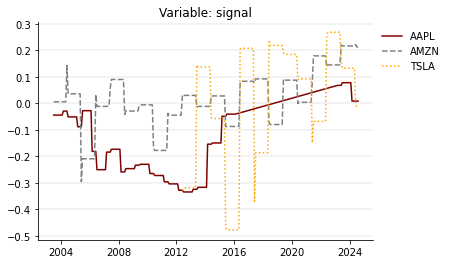

In [12]:
qpm.plot_variables(df_full, variable_list = ['signal'],  id_type = 'ticker', id_list = ['AAPL', 'AMZN', 'TSLA'],
                     start_date = '1999-01-01', end_date = '2024-08-31')

In [13]:
# Lag signal by one period so that the signal value is known at the time of portfolio creation
df_full['signal'] = qpm.create_lag(df_full, var_name = 'signal', lag = 1)

df = qpm.select_sample(df_full, sample_start = _SAMPLE_START, sample_end = _SAMPLE_END, remove_micro_caps = _REMOVE_MICRO_CAPS)

> Selecting Sample for Given Criteria...


In [14]:
df, df_rets = qpm.create_portfolios(df, sort_frequency = _SORT_FREQUENCY, num_port = _NUM_PORT)
print(df_rets.tail())

> Sorting stocks into 5 portfolios at frequency: June...
> Computing returns using various weights...
         ldate  retP_rank_longonly  retP_rank_longshort  retP_vw_P1  \
241 2023-09-01           -0.068904             0.005049   -0.058350   
242 2023-10-01           -0.078532             0.017178   -0.043560   
243 2023-11-01            0.083962            -0.019667    0.122763   
244 2023-12-01            0.115523            -0.021200    0.069548   
245 2024-01-01           -0.034199            -0.004955    0.040409   

     retP_vw_P2  retP_vw_P3  retP_vw_P4  retP_vw_P5   retF_vw  
241   -0.050702   -0.057145   -0.038381   -0.028525  0.029824  
242   -0.032683   -0.007190   -0.023645   -0.036540  0.007020  
243    0.085110    0.098958    0.084447    0.048168 -0.074595  
244    0.059171    0.029963    0.054590    0.042317 -0.027232  
245    0.020866    0.012136   -0.015635   -0.009440 -0.049849  


> Merging strategy returns with Fama and French factor returns...


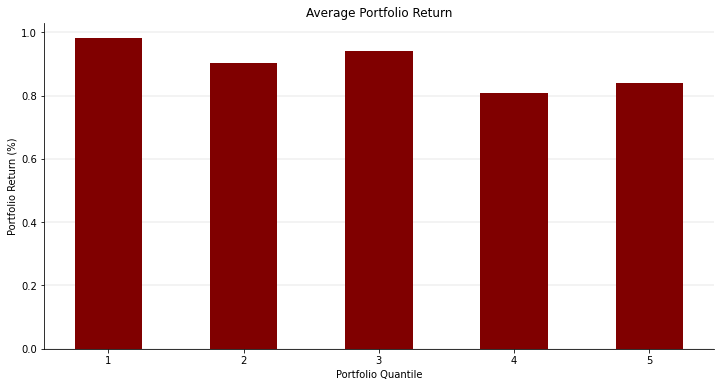

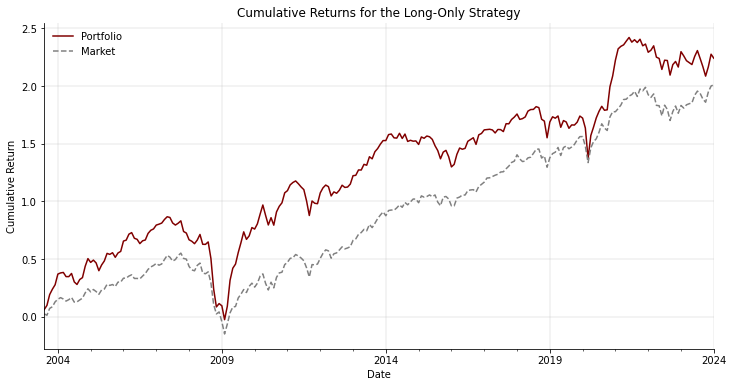

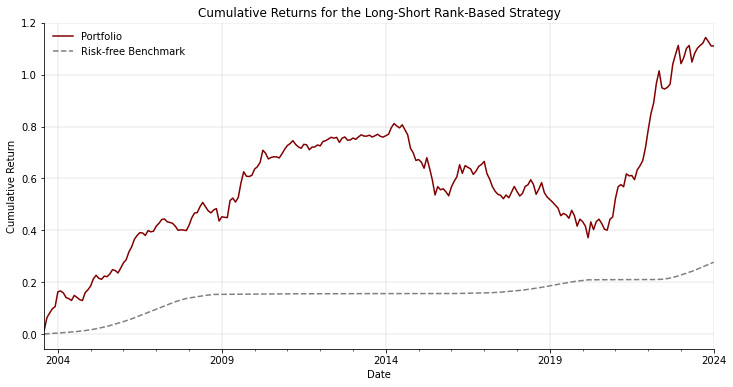

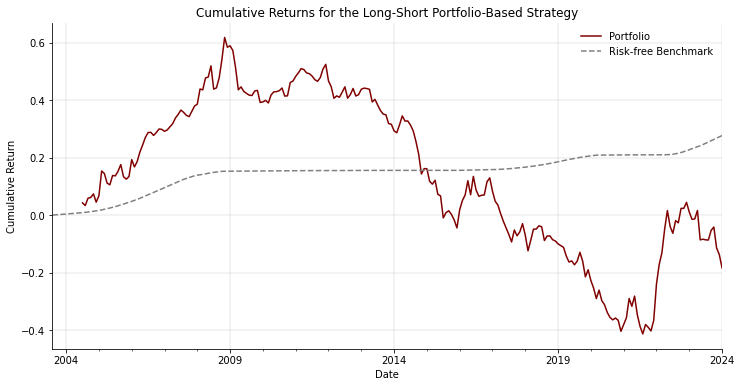

In [15]:
qpm.analyze_strategy(df_rets, analysis_type = 'Performance')

In [16]:
qpm.analyze_strategy(df_rets, analysis_type = 'Factor Regression')

> Merging strategy returns with Fama and French factor returns...

---------------------------------------------------------------
> Running Factor Regressions: Table 1  - 3 Fama-French Factors
---------------------------------------------------------------

                  (1)        (2)      (3)       (4)        (5)       (6)   
---------------------------------------------------------------------------
const          -0.0000    -0.0011   0.0031*  0.0006     0.0005    0.0037***
               (0.0021)   (0.0020)  (0.0016) (0.0018)   (0.0013)  (0.0014) 
mktrf          -0.1764*** 1.2866*** 0.0278   -0.2241*** 1.0738*** -0.0103  
               (0.0457)   (0.0430)  (0.0359) (0.0440)   (0.0304)  (0.0331) 
hml                                          0.4722***  0.0863**  0.4213***
                                             (0.0594)   (0.0411)  (0.0448) 
smb                                          -0.0169    0.8881*** -0.0347  
                                             (0.0774)   (